In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
station = pd.read_csv('data/station.csv')
trip = pd.read_csv('data/trip.csv')
weather = pd.read_csv('data/weather.csv')

status = pd.read_csv('data/status.csv', chunksize=10**6)

# Preguntas

## Consistencia
Los datos podrian ser inconsistentes dentro de un mismo archivo, o entre archivos.
* Los viajes siempre terminan despues de haber empezado?

## Coherencia
Que rango de fechas cubre cada archivo? Hablan todos del mismo periodo?

## Oferta y demanda
Hay alguna estacion que regularmente se quede sin bicicletas, o que regularmente le sobren?
Cuantas veces por dia se envian camiones a mover bicicletas entre estaciones?

In [4]:
# COUNT NULLS
tmp = weather.drop('zip_code', axis=1).apply(lambda x: x.isnull())
tmp['zip_code'] = weather.zip_code
tmp.groupby('zip_code').sum()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
zip_code,,,,,,,,,,,,,,,,,,,,,
94041,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,639.0,0.0
94063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,412.0,0.0,0.0,639.0,0.0
94107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,574.0,0.0
94301,0.0,1.0,1.0,1.0,51.0,51.0,51.0,51.0,51.0,51.0,...,13.0,13.0,13.0,1.0,1.0,453.0,1.0,1.0,653.0,1.0
95113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,638.0,0.0


In [5]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [6]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [7]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [8]:
# STATIONS PER CITY
station.city.value_counts().sort_values(ascending=False)

San Francisco    35
San Jose         16
Mountain View     7
Redwood City      7
Palo Alto         5
Name: city, dtype: int64

In [4]:
tmp = pd.DataFrame()
tmp['day'] = trip['start_date'].map(lambda x: int(x.split(' ')[0].split('/')[1]))

def getmonthnumber(s):
    v = s.split(' ')[0].split('/')
    return int(v[0]) + 12 * (int(v[2]) - 2013)

tmp['month'] = trip['start_date'].map(getmonthnumber)
tmp['val'] = 1
tmp = pd.pivot_table(tmp, index='month', columns='day', values='val', aggfunc=np.sum)
#tmp = tmp.groupby(['month','day']).sum()
tmp.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,748.0,714.0,640.0
9,706.0,661.0,597.0,606.0,677.0,814.0,796.0,704.0,769.0,892.0,...,584.0,1050.0,1075.0,1264.0,1082.0,1101.0,612.0,517.0,976.0,NaN
10,1072.0,1061.0,1158.0,1088.0,716.0,606.0,964.0,1018.0,1069.0,1086.0,...,1026.0,1029.0,1053.0,1048.0,501.0,292.0,967.0,1008.0,1122.0,1150.0
11,1120.0,544.0,372.0,1128.0,1158.0,1085.0,1197.0,1172.0,634.0,482.0,...,995.0,525.0,348.0,1019.0,1004.0,720.0,272.0,384.0,307.0,NaN
12,329.0,878.0,917.0,992.0,936.0,727.0,277.0,274.0,807.0,878.0,...,307.0,651.0,336.0,360.0,422.0,425.0,403.0,318.0,605.0,505.0


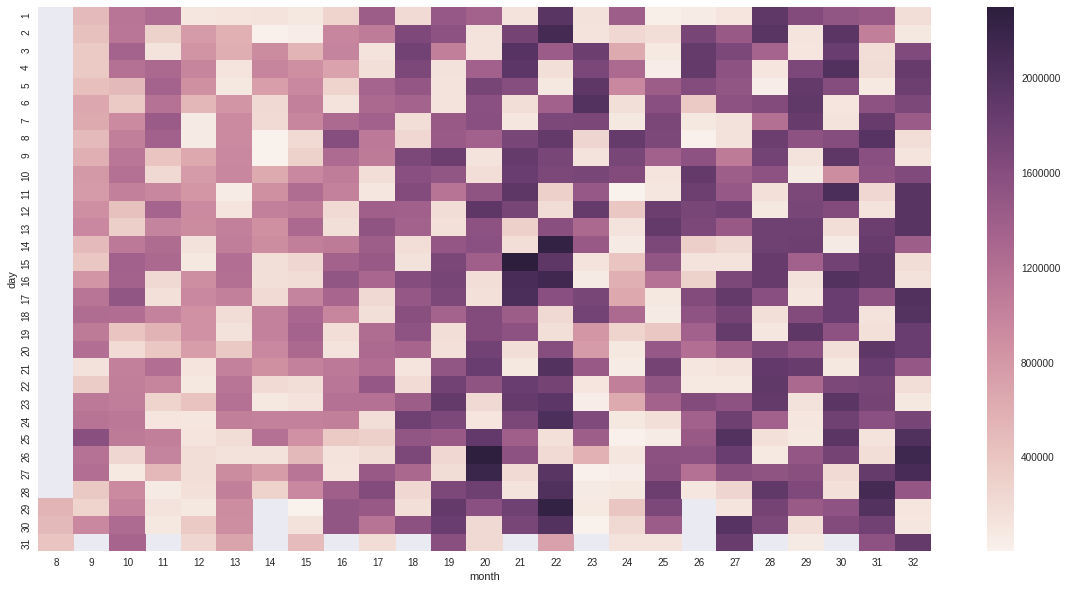

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(tmp.transpose()**2)

In [7]:
pieces = []
for chunk in status:
    chunk['under'] = (chunk['bikes_available'] == 0)
    chunk['count'] = 1
    del chunk['bikes_available']
    del chunk['docks_available']
    del chunk['time']
    pieces.append(chunk.groupby(['station_id', 'under']).aggregate(sum))

In [16]:
pieces[0]

count
station_id under        
2          False  260417
           True       74
3          False  260124
           True      366
4          False  259435
           True     1055
5          False  218426
           True      103

In [17]:
pieces[0].reset_index()

,station_id,under,count
0,2,False,260417
1,2,True,74
2,3,False,260124
3,3,True,366
4,4,False,259435
5,4,True,1055
6,5,False,218426
7,5,True,103


In [8]:
noidx = [p.reset_index() for p in pieces]
aggregate = pd.concat(noidx)

In [9]:
aggregate = aggregate.groupby(['station_id','under']).sum().reset_index()
aggregate

,station_id,under,count
0,2,False,1045558
1,2,True,1340
2,3,False,1046047
3,3,True,1066
4,4,False,1036482
5,4,True,10618
6,5,False,1045821
7,5,True,1321
8,6,False,1043578
9,6,True,3564


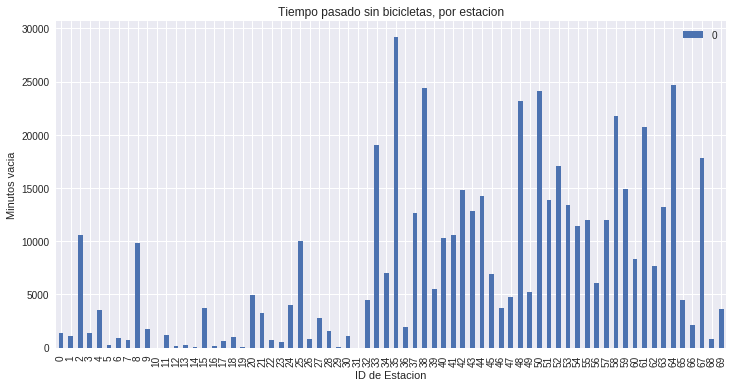

In [15]:
minutes = []
groups = aggregate.groupby('station_id')
trueval = lambda group: int(group[1][group[1].under == True]['count'])
for group in groups:
    minutes.append(trueval(group))

pd.DataFrame(minutes).plot.bar(figsize=(12,6))
plt.xlabel("ID de Estacion")
plt.ylabel("Minutos vacia")
plt.title("Tiempo pasado sin bicicletas, por estacion")

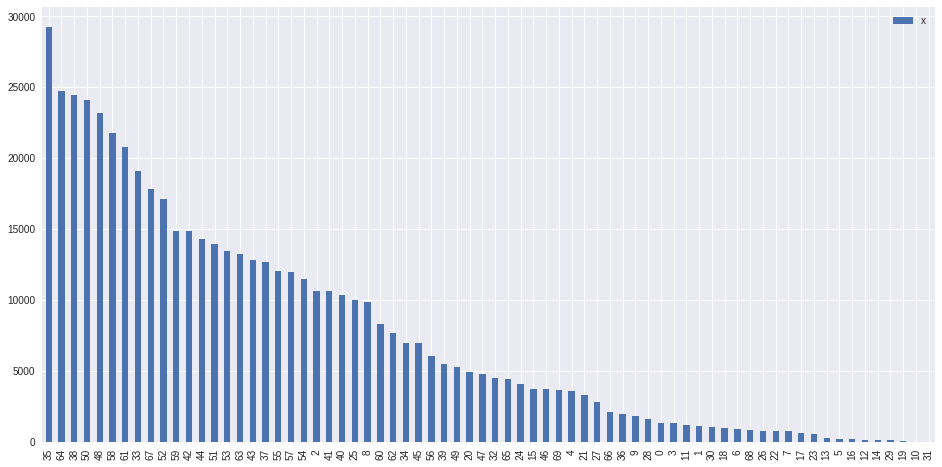

In [13]:
pd.DataFrame(minutes, columns=['x']).sort_values('x', ascending=False).plot.bar(figsize=(12,6))
plt.xlabel("ID de Estacion")
plt.ylabel("Minutos vacia")
plt.title("Tiempo pasado sin bicicletas, por estacion")

In [10]:
len(trip.zip_code.unique())

7440

In [12]:
trip.zip_code.value_counts()

94107       78704
94105       42672
94133       31359
94103       26673
94111       21409
94102       19757
94109       13989
95112       11564
nil         10682
94117        9851
94158        9180
94611        8026
94110        7621
94403        7168
94108        7149
94040        7114
94602        6816
94114        6707
94025        6439
94501        6419
94610        6301
95110        6054
94010        6039
94041        5867
94404        5323
94070        5229
95113        4811
94122        4802
94608        4714
94402        4633
            ...  
11901           1
7311            1
80022           1
30519           1
75246           1
56063           1
32118           1
74115           1
857066          1
13995000        1
40391           1
18036           1
44145           1
44141           1
72761           1
4306            1
9051            1
9588            1
9581            1
97351           1
24937           1
55987           1
55455           1
61114           1
1904      